In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def downsample(img, factor):
    while factor:
        img = img[::2, ::2]
        factor -= 1
    return img

def quantizacao(img, k):
    L = (2**k) -1
    img_quant = np.float64(img)
    img_quant = img_quant/np.amax(img_quant)
    img_quant = np.uint8(img_quant * L)
    return img_quant

img1 = cv.imread("fig1.tif",0)


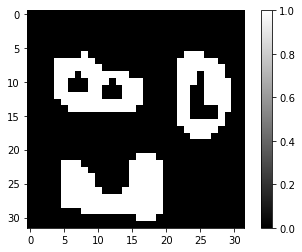

32

In [4]:

img1_ = downsample(quantizacao(cv.bitwise_not(img1),1),3)
plt.figure()
plt.imshow(img1_, cmap = 'gray')
plt.colorbar()
plt.show()
len(img1_)


In [5]:
# label the spots
def Label_Spot(Data):
    label=[]
    i = 1
    for row in range(len(Data)):
        for col in range(len(Data)):
            if((Data[row][col] != 0)):
                flag = Neigbor_4(Data, row, col, label)
                if flag != False:
                    Data[row][col] = flag
                else:
                    Data[row][col] = i
                    label.append(i)
                    i += 1
    return Data, label

def mod_nei8(data, nei4, labels):
    class lable_extractor(object):
        """docstring for lable_extractor"""
        def __init__(self, arg):
            super(lable_extractor, self).__init__()
            self.arg = arg
            

# serch for labeled in 4 neighbor region
def Neigbor_4(Data, row, col, label):
    if Data[row-1][col] in label and (Data[row-1][col]!= Data[row][col]):
        return Data[row-1][col]
    elif Data[row][col-1] in label and (Data[row][col-1]!= Data[row][col]):
        return Data[row][col-1]
    # elif Data[row][col+1] in label and (Data[row][col+1]!= Data[row][col]):
    #     return Data[row][col+1]
    # elif Data[row+1][col] in label and (Data[row+1][col]!= Data[row][col]):
    #     return Data[row+1][col]
    else:
        return False

# Second pass relabeling conected spots
def Re_labeling(Data, label):
    for row in range(len(Data)-1):
        for col in range(len(Data)-1):
            if((Data[row][col] in label)):
                flag = Neigbor_4(Data, row, col, label)
                if flag != False:
                    if Data[row][col] < flag:
                        label.remove(flag)
                        Data[Data == flag] = Data[row][col]
                    else:
                        label.remove(Data[row][col])
                        Data[Data == Data[row][col]] = flag
    for i, val in enumerate(label, 1):
        Data[Data == val] = i
        j = i
    label = np.arange(1, len(label)+1 )
    return Data, label
# ============================================
# ============================================
#%% Classifying spots
# ============================================

def Classifying(Data, label):
    A,B = [],[]
    for i in label:
        plt.figure(i)
        Aux = np.copy(Data)
        plt.subplot(221)
        sns.heatmap(Aux, annot=True, cmap="Pastel1",)
        Aux[Aux != i] = 0
        Aux[Aux == i] = 1
        Aux = np.absolute(Aux-1) # Invert Values
        plt.subplot(222)
        sns.heatmap(Aux, annot=True, cmap="Pastel1",)
        Aux, Aux_label = Label_Spot(Aux)
        plt.subplot(223)
        sns.heatmap(Aux, annot=True, cmap="Pastel1",)
        Aux, Aux_label = Re_labeling(Aux, Aux_label)
        plt.subplot(224)
        sns.heatmap(Aux, annot=True, cmap="Pastel1",)
        if(len(Aux_label)) > 1:
            B.append(i)
        else:
            A.append(i)
    print("\nTipo A:  {0}\nTipo B:  {1}\n".format(len(A),len(B)))
    return Data, A, B


<AxesSubplot:>

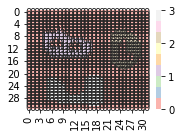

In [6]:
Aux,label = Label_Spot(img1_)
Aux, label = Re_labeling(Aux, label)

# Heatmap normal
plt.subplot(221)
sns.heatmap(Aux, annot=True, cmap="Pastel1",)



In [7]:
print("\n Total de manchas:  {0}".format(len(label)))


 Total de manchas:  3


In [8]:
def viz4(img, row, col, label):
    up = img[row-1][col]
    left = img[row][col-1]

    if up in label and (up != img[row][col]):
        return up
    elif left in label and (left != img[row][col]):
        return left
    else:
        return 0


def firstlabel(img):
    label=[]
    i = 1
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            if((img[row][col] != 0)):
                flag = viz4(img, row, col, label)
                if flag != 0:
                    img[row][col] = flag  
                else:
                    img[row][col] = i
                    label.append(i)
                    i += 1  
                    
    return img, label



def secondlabel(img, label):
    for row in range(img.shape[0]-1):
        for col in range(img.shape[1]-1):
            if((img[row][col] in label)):
                flag = viz4(img, row, col, label)
                if flag != 0:
                    if img[row][col] < flag:
                        label.remove(flag)
                        img[img == flag] = img[row][col]
                    else:
                        label.remove(img[row][col])
                        img[img == img[row][col]] = flag
    for i, val in enumerate(label, 1):
        img[img == val] = i
    label = np.arange(1, len(label)+1 )
    return img, label

<AxesSubplot:>

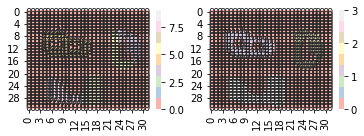

In [9]:
Aux1,label1 = firstlabel(img1_)
plt.subplot(221)
sns.heatmap(Aux1, annot=True, cmap="Pastel1",)
Aux2, label2 = secondlabel(Aux1, label1)

# Heatmap normal
plt.subplot(222)
sns.heatmap(Aux2, annot=True, cmap="Pastel1",)

In [10]:
img2 = cv.imread("fig2.tif",0)
img3 = cv.imread("fig3.tif",0)
img4 = cv.imread("fig4.tif",0)
img5 = cv.imread("fig5.tif",0)

In [16]:
len(img5)

128

In [17]:
import plotly.express as px

In [19]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                    z=[[1, 20, 30],
                      [20, 1, 60],
                      [30, 60, 1]]))
fig.show()